In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Setup
os.chdir("..")
plt.style.use("ggplot")

%matplotlib inline

In [3]:
def separator(x):
    return x**(1/8)

def which_cluster(x):
    if x[1] >= separator(x[0]):
        return 1
    else:
        return -1

In [4]:
n_train = 100
X_train = np.random.uniform(size=(n_train, 2))

y_train = np.array([
    which_cluster(X_train[k, :]) for k in range(n_train)
], dtype=np.int8)

In [5]:
n_test = 500
X_test = np.random.uniform(size=(n_test, 2))

y_test = np.array([
    which_cluster(X_test[k, :]) for k in range(n_test)
], dtype=np.int8)

In [6]:
t = np.linspace(0, 1, 100)
sep = separator(t)

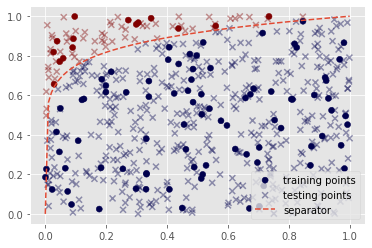

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='seismic', label="training points")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='seismic', marker='x', alpha=0.4, label="testing points")
plt.plot(t, sep, '--', label='separator')
plt.legend()

In [8]:
from gp.models import GPBinaryClassifier
from gp.kernels import RBF
from gp.sigmoids import Logistic

In [9]:
ker = RBF(input_dim=2, l=1., sigma=1.)
logistic_func = Logistic()
gpc = GPBinaryClassifier(kernel_function=ker, sigmoid_function=logistic_func)

In [10]:
gpc.fit(X_train, y_train, verbose=True)
gpc._loglik

objective=-72.32625605165461
objective=-39.77289522092937
objective=-36.56380406158395
objective=-36.17285025040917
objective=-36.16560466383533
objective=-36.16560199917795
objective=-36.16560199917757
objective=-36.16560199917756
objective=-36.165601999177575
objective=-36.165601999177575


-37.73937257323607

In [11]:
n_err = 0
for index in range(n_test):
    verif = 2*(gpc.predict(X_test[index, :]) >= .5) -1 
    if verif != y_test[index]:
        n_err += 1
print('Percentage of errors: %.2f' %((100.*n_err)/n_test))

Percentage of errors: 12.00
